In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats
import cftime

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'ERSSTv5_deseasoneddetrended_5monthrunningmean_1950-2021.nc'
data = xr.open_mfdataset(datafile).compute()
sst = data.sst
sst

<xarray.DataArray 'sst' (time: 859, lat: 89, lon: 180)> Size: 110MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) object 7kB 1950-06-01 00:00:00 ... 2021-12-15 00:00:00
  * lat      (lat) float64 712B -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0

In [9]:
nsize = sst.shape
print(nsize)

(859, 89, 180)


In [12]:
sst_s = sst.sel(lat=slice(-5,5),lon=slice(-170+360,-120+360))
nino34 = sst_s.mean(dim='lat').mean(dim='lon')
nino34

<xarray.DataArray 'sst' (time: 859)> Size: 7kB
array([-1.25487574e+00, -1.08986989e+00, -9.35813070e-01, -8.41517700e-01,
       -7.46620137e-01, -6.13831588e-01, -6.14911157e-01, -6.87904944e-01,
       -7.65514303e-01, -7.84147307e-01, -6.62970277e-01, -4.54115402e-01,
       -1.77333983e-01,  1.00550344e-01,  3.85547213e-01,  5.00353643e-01,
        6.32019048e-01,  7.20657086e-01,  8.25315676e-01,  8.14757611e-01,
        7.94071429e-01,  6.83326477e-01,  5.56921294e-01,  4.51376693e-01,
        3.76520489e-01,  2.60958674e-01,  1.27098998e-01,  4.33110357e-02,
       -4.17416927e-02, -1.14607846e-01, -1.67577427e-01, -1.06733223e-01,
        2.89313849e-02,  1.41403543e-01,  2.80397651e-01,  4.86602405e-01,
        6.50454395e-01,  7.09257697e-01,  7.05493075e-01,  6.71805125e-01,
        6.71121612e-01,  6.24383310e-01,  5.76394612e-01,  6.17239575e-01,
        6.73612332e-01,  6.62852141e-01,  5.46933638e-01,  2.84594653e-01,
        5.63063949e-02, -1.97960996e-01, -4.71622936e-01, -6.75714956e-01,
       -7.77138590e-01, -9.20231283e-01, -9.65310107e-01, -1.00917787e+00,
       -9.21705102e-01, -7.97644193e-01, -7.20967238e-01, -7.28813475e-01,
       -7.00098430e-01, -7.32389672e-01, -7.56607041e-01, -8.07782006e-01,
       -8.68188213e-01, -1.08274352e+00, -1.34089877e+00, -1.53018815e+00,
       -1.51481928e+00, -1.43236386e+00, -1.14497266e+00, -8.40883272e-01,
       -5.78631362e-01, -5.02424540e-01, -5.01211713e-01, -5.66096122e-01,
       -5.86698155e-01, -6.29594876e-01, -6.79577956e-01, -6.58479585e-01,
...
        5.91854237e-01,  7.41432730e-01,  9.61974012e-01,  1.25612582e+00,
        1.54041134e+00,  1.81873466e+00,  2.12052329e+00,  2.34787516e+00,
        2.46290684e+00,  2.46555603e+00,  2.31068222e+00,  1.95857694e+00,
        1.50779547e+00,  1.01083112e+00,  4.85584217e-01,  5.48492506e-02,
       -2.54865428e-01, -4.72898154e-01, -6.24337540e-01, -6.44086727e-01,
       -6.30447427e-01, -5.43174088e-01, -3.99532752e-01, -2.01409507e-01,
       -1.45103987e-02,  1.55997328e-01,  2.42208118e-01,  2.11671073e-01,
        6.93736006e-02, -1.23606107e-01, -3.87246130e-01, -6.51524319e-01,
       -8.29572756e-01, -9.07579677e-01, -9.62509243e-01, -8.63583662e-01,
       -6.86261730e-01, -4.60607795e-01, -2.58732006e-01, -7.08388724e-02,
        1.11721162e-01,  3.24634463e-01,  4.91474963e-01,  6.28204716e-01,
        7.23951898e-01,  7.63177332e-01,  7.33819186e-01,  6.83279450e-01,
        6.33810793e-01,  6.12539574e-01,  5.56986729e-01,  4.11312824e-01,
        2.78910818e-01,  2.56479071e-01,  2.66442021e-01,  2.86596668e-01,
        3.84156811e-01,  4.41670728e-01,  4.30235662e-01,  4.04405674e-01,
        2.62215406e-01,  9.27300142e-02, -2.32130206e-02, -2.29591664e-01,
       -4.83171662e-01, -6.86792652e-01, -9.07095047e-01, -1.09042237e+00,
       -1.18736176e+00, -1.23144401e+00, -1.15215372e+00, -1.00697349e+00,
       -8.53736502e-01, -6.92180949e-01, -5.52627342e-01, -4.92979489e-01,
       -4.75791015e-01, -5.81386238e-01, -7.19192098e-01])
Coordinates:
  * time     (time) object 7kB 1950-06-01 00:00:00 ... 2021-12-15 00:00:00

## Let's review how to calculate correlation coefficient and p-value using scipy.stats.pearsonr function

In [25]:
x1 = np.array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
y1 = np.array([ 3.   ,  3.062,  3.136,  3.234,  3.368,  3.55 ,  3.792,  4.106,
        4.504,  4.998,  5.6  ,  6.322,  7.176,  8.174,  9.328, 10.65 ,
       12.152, 13.846, 15.744, 17.858])

### How would you calculate the Pearson correlation coefficient and p-value?

In [26]:
r, p = 
print(r,p)

0.9244212652353545 5.795286260038882e-09


## To plot a correlation map, we need to first calculate the correlation coefficient at each grid point. Using for-loop to loop through all grid points. 

In [14]:
r_xy = np.zeros([nsize[1],nsize[2]])
p_val = np.zeros([nsize[1],nsize[2]])
for iy in range(nsize[1]):
    for ix in range(nsize[2]):
        r_xy[iy,ix], p_val[iy,ix] = stats.pearsonr(nino34.values, sst.values[:,iy,ix])
print(r_xy.shape,p_val.shape)

(89, 180) (89, 180)


## Now we have the correlation matrix, which is a 2-D matrix with dimension of latitude and longitude. Use what we learn in unit0 before to plot a spatial map figure. 

/tmp/ipykernel_513994/1426767295.py:6: UserWarning: Adding colorbar to a different Figure <Figure size 1000x500 with 2 Axes> than <Figure size 1000x500 with 2 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)


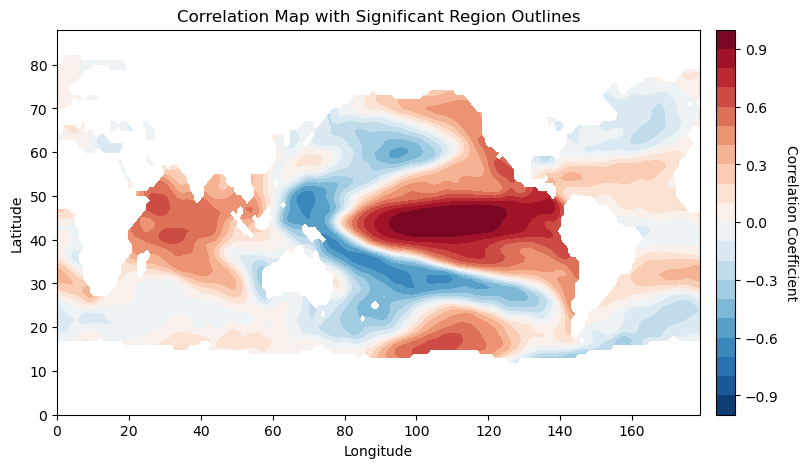

In [29]:
# plot the correlation map
figure = plt.figure(figsize=(10,5))


plt.show()

## Now we want to indicate which region the correlation coefficient is statistically significant at 5% significance level. Usually, we will consider the correlation that is only statistically significant meaningful.  

/tmp/ipykernel_513994/1009251136.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 1000x500 with 2 Axes> than <Figure size 1000x500 with 2 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)


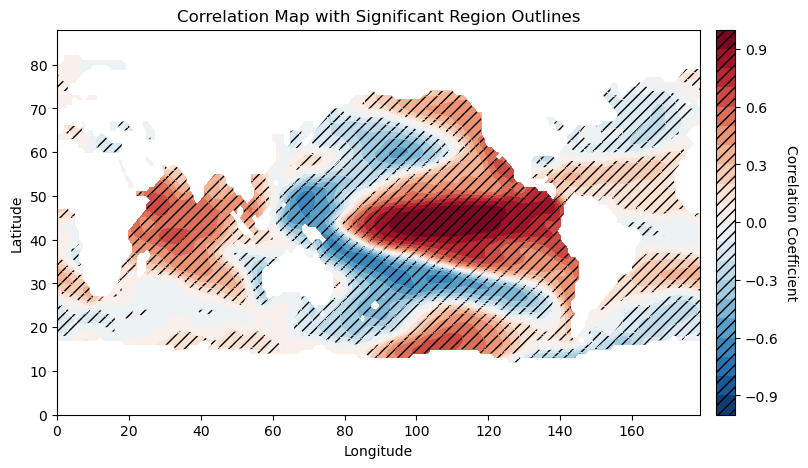

In [47]:
# plot the correlation map
figure = plt.figure(figsize=(10,5))
ax = figure.add_subplot(1,1,1)

# First we set a significance level alpha and compare p-values with the level
alpha = 0.05
# Then we compare p-values with alpha. We copy the correlation matrix to 
# a new variable named r_xy_p. 
# Where p_val larger than alpha, it is NOT statistically significant at that significance level,
# and we set these non-significant data to NaN. 
r_xy_p = np.copy(r_xy)
r_xy_p[np.where(p_val>0.05)] = np.nan

im = ax.contourf(r_xy, cmap='RdBu_r', levels=np.arange(-1,1.1,0.1))

im = ax.contourf(r_xy_p, cmap='RdBu_r', hatches=['///'], levels=np.arange(-1,1.1,0.1))

cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
cbar.ax.set_ylabel("Correlation Coefficient", rotation=-90, va="bottom")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Correlation Map with Significant Region Outlines")

plt.show()